In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer


df = pd.read_csv('movies.csv')
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722317 entries, 0 to 722316
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    722317 non-null  int64  
 1   title                 722311 non-null  object 
 2   genres                512000 non-null  object 
 3   original_language     722317 non-null  object 
 4   overview              604074 non-null  object 
 5   popularity            722317 non-null  float64
 6   production_companies  337391 non-null  object 
 7   release_date          670768 non-null  object 
 8   budget                722317 non-null  float64
 9   revenue               722317 non-null  float64
 10  runtime               687982 non-null  float64
 11  status                722317 non-null  object 
 12  tagline               108476 non-null  object 
 13  vote_average          722317 non-null  float64
 14  vote_count            722317 non-null  float64
 15  

In [153]:
# prompt: crie uma copia segura desse dataset df

df_copy = df.copy()


In [154]:
df_copy.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,3.520565e+08,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,6.567582e+07,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,533535,Deadpool & Wolverine,Action-Comedy-Science Fiction,en,A listless Wade Wilson toils away in civilian ...,5410.496,Marvel Studios-Maximum Effort-21 Laps Entertai...,2024-07-24,200000000.0,1.326387e+09,128.0,Released,Come together.,7.765,3749.0,Ryan Reynolds-Hugh Jackman-Emma Corrin-Matthew...,hero-superhero-anti hero-mutant-breaking the f...,/8cdWjvZQUExUUTzyp4t6EDMubfO.jpg,/dvBCdCohwWbsP5qAaglOXagDMtk.jpg,573435-519182-957452-1022789-945961-718821-103...
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,4.070455e+08,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...
4,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,6.838137e+08,167.0,Released,Long live the fighters.,8.300,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,epic-based on novel or book-fight-sandstorm-sa...,/czembW0Rk1Ke7lCJGahbOhdCuhV.jpg,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,438631-763215-792307-1011985-467244-634492-359...


In [155]:
# Substituir valores zero por 1 nas colunas 'budget' e 'revenue'
df_copy['budget'] = df_copy['budget'].replace(0, 1)
df_copy['revenue'] = df_copy['revenue'].replace(0, 1)

# Aplicar a transformação logarítmica
df_copy['budget_log'] = np.log(df_copy['budget'])
df_copy['revenue_log'] = np.log(df_copy['revenue'])

c:\Users\thalyson\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [156]:
df_copy.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,budget_log,revenue_log
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,3.520565e+08,...,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...,18.675323,19.679302
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,6.567582e+07,...,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...,16.705882,18.000241
2,533535,Deadpool & Wolverine,Action-Comedy-Science Fiction,en,A listless Wade Wilson toils away in civilian ...,5410.496,Marvel Studios-Maximum Effort-21 Laps Entertai...,2024-07-24,200000000.0,1.326387e+09,...,Come together.,7.765,3749.0,Ryan Reynolds-Hugh Jackman-Emma Corrin-Matthew...,hero-superhero-anti hero-mutant-breaking the f...,/8cdWjvZQUExUUTzyp4t6EDMubfO.jpg,/dvBCdCohwWbsP5qAaglOXagDMtk.jpg,573435-519182-957452-1022789-945961-718821-103...,19.113828,21.005725
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,4.070455e+08,...,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...,19.113828,19.824435
4,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,6.838137e+08,...,Long live the fighters.,8.300,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,epic-based on novel or book-fight-sandstorm-sa...,/czembW0Rk1Ke7lCJGahbOhdCuhV.jpg,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,438631-763215-792307-1011985-467244-634492-359...,19.062535,20.343196


In [157]:
df_copy = df_copy.drop(['budget', 'revenue'], axis=1)

In [158]:
df_copy.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,budget_log,revenue_log
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...,18.675323,19.679302
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...,16.705882,18.000241
2,533535,Deadpool & Wolverine,Action-Comedy-Science Fiction,en,A listless Wade Wilson toils away in civilian ...,5410.496,Marvel Studios-Maximum Effort-21 Laps Entertai...,2024-07-24,128.0,Released,Come together.,7.765,3749.0,Ryan Reynolds-Hugh Jackman-Emma Corrin-Matthew...,hero-superhero-anti hero-mutant-breaking the f...,/8cdWjvZQUExUUTzyp4t6EDMubfO.jpg,/dvBCdCohwWbsP5qAaglOXagDMtk.jpg,573435-519182-957452-1022789-945961-718821-103...,19.113828,21.005725
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...,19.113828,19.824435
4,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,167.0,Released,Long live the fighters.,8.300,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,epic-based on novel or book-fight-sandstorm-sa...,/czembW0Rk1Ke7lCJGahbOhdCuhV.jpg,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,438631-763215-792307-1011985-467244-634492-359...,19.062535,20.343196


<Axes: >

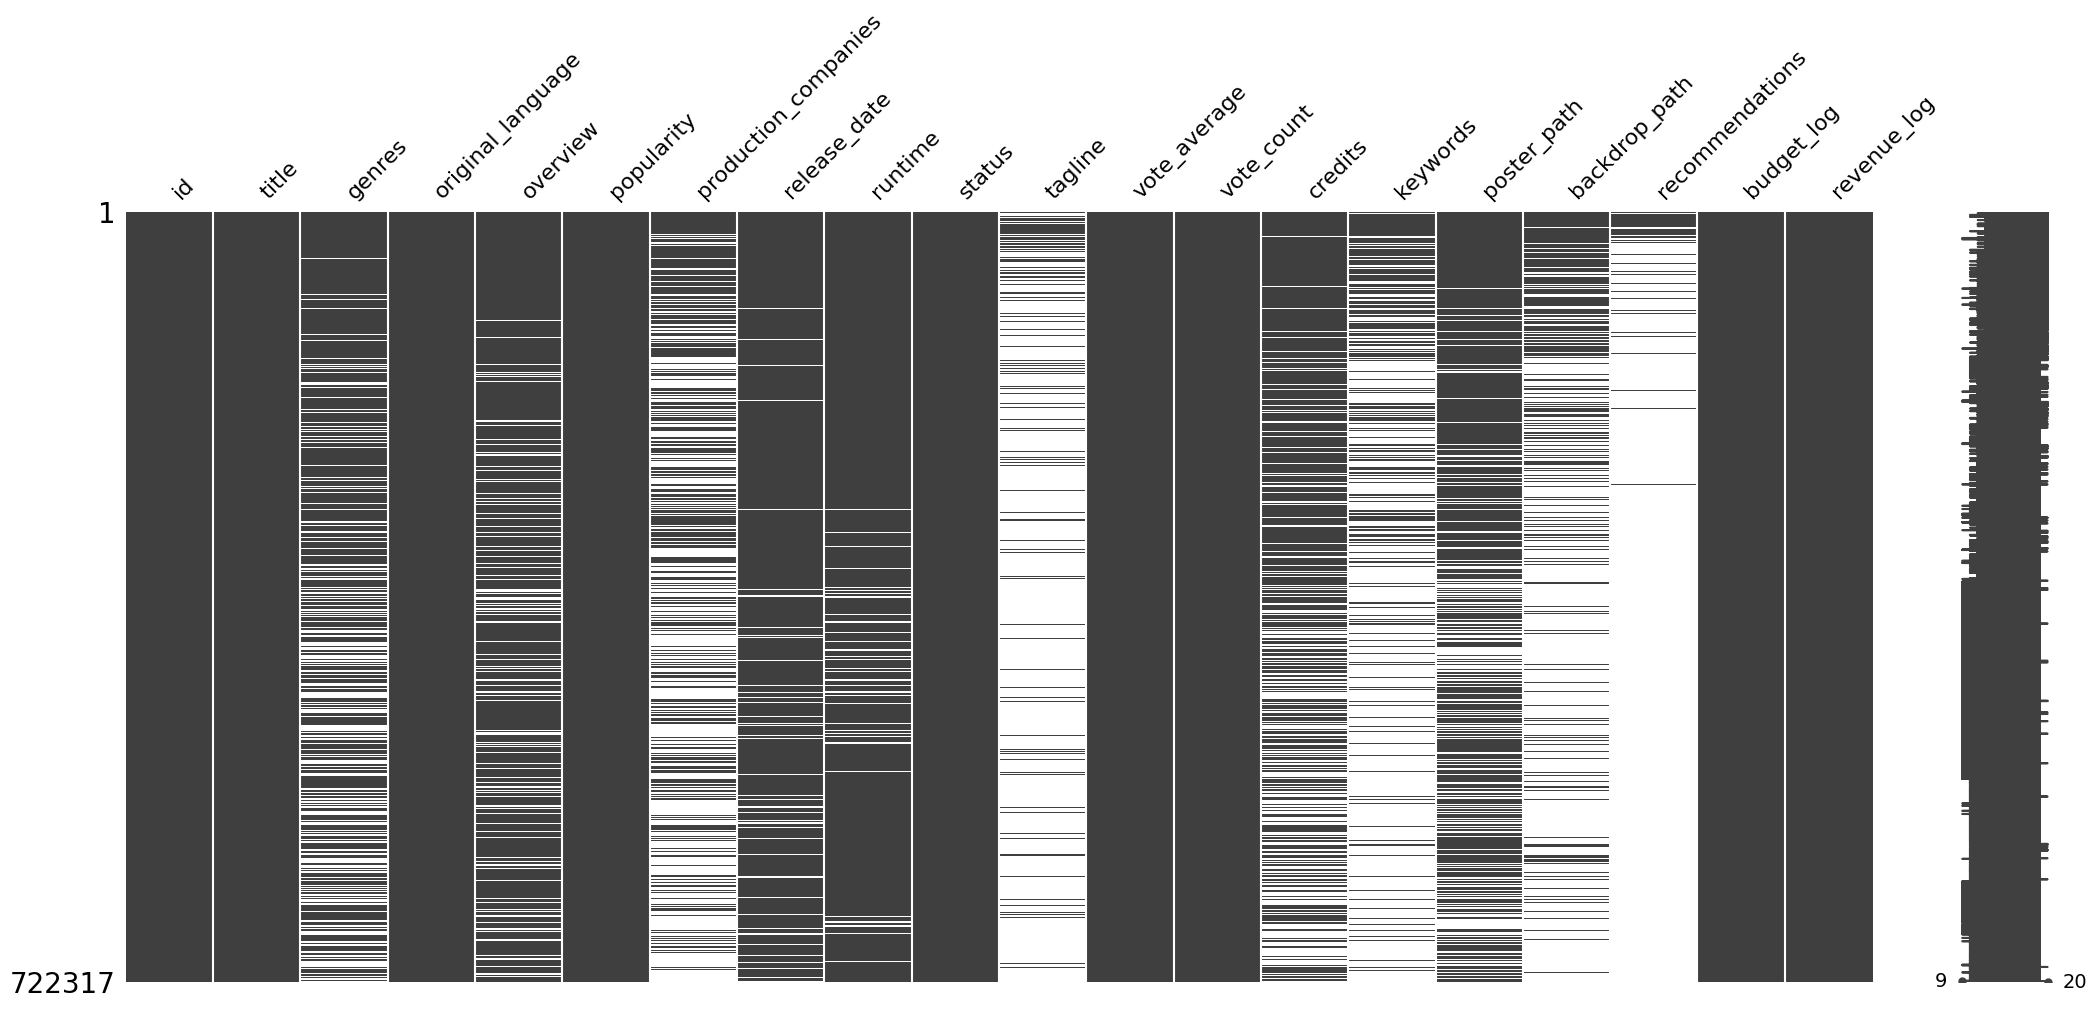

In [159]:
msno.matrix(df_copy)

In [160]:
# Assumindo que a coluna de data se chama 'release_date'
# Verifique o tipo de dado da coluna
print(df_copy['release_date'].dtype)

# Se o tipo não for 'datetime64[ns]', converta:
df_copy['release_date'] = pd.to_datetime(df_copy['release_date'], errors='coerce')
# 'errors='coerce'' transformará quaisquer datas inválidas em NaT (Not a Time),
# o que é útil para lidar com valores ausentes ou formatos incorretos.

object


In [161]:
# prompt: vamos gerar duas colunas derivadas de release_date , a relase year e  release month com numeros inteiros e remover a release_year

# Extrair o ano e o mês para novas colunas
df_copy['release_year'] = df_copy['release_date'].dt.year
df_copy['release_month'] = df_copy['release_date'].dt.month

# Converter as novas colunas para inteiros (se não forem nulas)
df_copy['release_year'] = df_copy['release_year'].astype('Int64') # Usar 'Int64' para permitir NaNs
df_copy['release_month'] = df_copy['release_month'].astype('Int64') # Usar 'Int64' para permitir NaNs

# Remover a coluna 'release_date' original
df_copy = df_copy.drop('release_date', axis=1)

df_copy.head()

,id,title,genres,original_language,overview,popularity,production_companies,runtime,status,tagline,...,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,budget_log,revenue_log,release_year,release_month
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,116.0,Released,Back for seconds.,...,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...,18.675323,19.679302,2023,8
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,103.0,Released,Inspired by the actual files of Father Gabriel...,...,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...,16.705882,18.000241,2023,4
2,533535,Deadpool & Wolverine,Action-Comedy-Science Fiction,en,A listless Wade Wilson toils away in civilian ...,5410.496,Marvel Studios-Maximum Effort-21 Laps Entertai...,128.0,Released,Come together.,...,3749.0,Ryan Reynolds-Hugh Jackman-Emma Corrin-Matthew...,hero-superhero-anti hero-mutant-breaking the f...,/8cdWjvZQUExUUTzyp4t6EDMubfO.jpg,/dvBCdCohwWbsP5qAaglOXagDMtk.jpg,573435-519182-957452-1022789-945961-718821-103...,19.113828,21.005725,2024,7
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,127.0,Released,Unite or fall.,...,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...,19.113828,19.824435,2023,6
4,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,167.0,Released,Long live the fighters.,...,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,epic-based on novel or book-fight-sandstorm-sa...,/czembW0Rk1Ke7lCJGahbOhdCuhV.jpg,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,438631-763215-792307-1011985-467244-634492-359...,19.062535,20.343196,2024,2


In [162]:
# prompt: quantos com o status não lançado existem ?

# Conta quantos filmes têm o status 'Não lançado'
nao_lancados_count = df_copy[df_copy['status'] == 'Não lançado'].shape[0]

print(f"Número de filmes com status 'Não lançado': {nao_lancados_count}")

Número de filmes com status 'Não lançado': 0


In [163]:
df_copy = df_copy.drop('status', axis=1)

In [164]:
df_copy.head()

,id,title,genres,original_language,overview,popularity,production_companies,runtime,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,budget_log,revenue_log,release_year,release_month
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,116.0,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...,18.675323,19.679302,2023,8
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,103.0,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...,16.705882,18.000241,2023,4
2,533535,Deadpool & Wolverine,Action-Comedy-Science Fiction,en,A listless Wade Wilson toils away in civilian ...,5410.496,Marvel Studios-Maximum Effort-21 Laps Entertai...,128.0,Come together.,7.765,3749.0,Ryan Reynolds-Hugh Jackman-Emma Corrin-Matthew...,hero-superhero-anti hero-mutant-breaking the f...,/8cdWjvZQUExUUTzyp4t6EDMubfO.jpg,/dvBCdCohwWbsP5qAaglOXagDMtk.jpg,573435-519182-957452-1022789-945961-718821-103...,19.113828,21.005725,2024,7
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,127.0,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...,19.113828,19.824435,2023,6
4,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,167.0,Long live the fighters.,8.300,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,epic-based on novel or book-fight-sandstorm-sa...,/czembW0Rk1Ke7lCJGahbOhdCuhV.jpg,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,438631-763215-792307-1011985-467244-634492-359...,19.062535,20.343196,2024,2


In [165]:
# prompt: vamos tirar a casa decimal de vote count

median_runtime = df_copy['runtime'].median()
df_copy['runtime'] = df_copy['runtime'].fillna(median_runtime)

df_copy['runtime'] = df_copy['runtime'].astype(int)
df_copy['vote_count'] = df_copy['vote_count'].astype(int)

In [166]:
df_copy.head(1)

,id,title,genres,original_language,overview,popularity,production_companies,runtime,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,budget_log,revenue_log,release_year,release_month
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,116,Back for seconds.,7.079,1365,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...,18.675323,19.679302,2023,8


In [167]:
# --- 2. Separar os gêneros (assumindo que estão separados por hífen) ---
df['genres'] = df['genres'].apply(lambda x: x.split('-') if isinstance(x, str) else [])

# --- 3. Contar ocorrência de cada gênero ---
contagem = Counter([genero for sublist in df['genres'] for genero in sublist])

# --- 4. Identificar gêneros raros (menos de 900 ocorrências) ---
generos_raros = [g for g, count in contagem.items() if count < 900]

# --- 5. Substituir gêneros raros por "Outros" ---
def substituir_raros(lista):
    return [g if g not in generos_raros else 'Outros' for g in lista]

df['genres'] = df['genres'].apply(substituir_raros)

# --- 6. Recontar e exibir os gêneros após substituição ---
contagem_atualizada = Counter([genero for lista in df['genres'] for genero in lista])
genero_series = pd.Series(contagem_atualizada).sort_values(ascending=False)

print(genero_series)
print(f"\nTotal de gêneros únicos após tratamento: {len(genero_series)}")

# --- 7. Transformar em variáveis dummies com MultiLabelBinarizer ---
mlb = MultiLabelBinarizer()
generos_dummies = pd.DataFrame(mlb.fit_transform(df['genres']),
                                columns=mlb.classes_,
                                index=df.index)

# --- 8. Concatenar os dummies ao dataframe original ---
df = pd.concat([df, generos_dummies], axis=1)

# --- 9. Visualizar resultado final ---
print("\nDataFrame final com colunas dummies de gêneros:")
print(df.head())

Drama              176534
Documentary        116948
Comedy             110461
Animation           42145
Romance             41217
Thriller            36900
Horror              36355
Action              36177
Music               36005
Crime               26992
Family              22793
Adventure           19547
TV Movie            19007
Fantasy             16906
Science Fiction     16613
Mystery             15240
History             13384
War                  8941
Western              7933
dtype: int64

Total de gêneros únicos após tratamento: 19

DataFrame final com colunas dummies de gêneros:
       id                             title  \
0  615656                 Meg 2: The Trench   
1  758323               The Pope's Exorcist   
2  533535              Deadpool & Wolverine   
3  667538  Transformers: Rise of the Beasts   
4  693134                    Dune: Part Two   

                                 genres original_language  \
0     [Action, Science Fiction, Horror]                

In [168]:
idioma_para_continente = {
    # América do Norte
    'en': 'America_do_Norte',

    # Ásia
    'ko': 'Asia',
    'cn': 'Asia', # Chinês (Simplificado/Mandarin)
    'hi': 'Asia', # Hindi
    'ja': 'Asia', # Japonês
    'zh': 'Asia', # Chinês (Genérico/Variedades)
    'te': 'Asia', # Telugu
    'ar': 'Asia', # Árabe (Também África)
    'ml': 'Asia', # Malayalam
    'kn': 'Asia', # Kannada
    'ta': 'Asia', # Tamil
    'km': 'Asia', # Khmer
    'he': 'Asia', # Hebraico
    'bn': 'Asia', # Bengali
    'ms': 'Asia', # Malaio
    'bo': 'Asia', # Tibetano
    'kk': 'Asia', # Cazaque (Também Europa)
    'ka': 'Asia', # Georgiano (Também Europa)
    'ku': 'Asia', # Curdo (Também Europa)
    'ur': 'Asia', # Urdu
    'ps': 'Asia', # Pashto
    'mr': 'Asia', # Marathi
    'lo': 'Asia', # Laosiano
    'ne': 'Asia', # Nepalês


    # Europa
    'es': 'Europa', # Espanhol (Também Américas)
    'no': 'Europa', # Norueguês
    'fi': 'Europa', # Finlandês
    'ru': 'Europa', # Russo (Também Ásia)
    'uk': 'Europa', # Ucraniano
    'nl': 'Europa', # Holandês
    'it': 'Europa', # Italiano
    'fr': 'Europa', # Francês (Também Américas, África)
    'pl': 'Europa', # Polonês
    'pt': 'Europa', # Português (Também Américas, África)
    'de': 'Europa', # Alemão
    'ro': 'Europa', # Romeno
    'sr': 'Europa', # Sérvio
    'sv': 'Europa', # Sueco
    'gl': 'Europa', # Galego
    'tr': 'Europa', # Turco (Também Ásia)
    'cs': 'Europa', # Tcheco
    'el': 'Europa', # Grego
    'ga': 'Europa', # Irlandês
    'mk': 'Europa', # Macedônio
    'sh': 'Europa', # Sérvio-Croata
    'hu': 'Europa', # Húngaro
    'eu': 'Europa', # Basco
    'lv': 'Europa', # Letão
    'sk': 'Europa', # Eslovaco
    'et': 'Europa', # Estoniano
    'hy': 'Europa', # Armênio (Também Ásia)
    'sq': 'Europa', # Albanês
    'se': 'Europa', # Sami Setentrional
    'sl': 'Europa', # Esloveno
    'cy': 'Europa', # Galês
    'lt': 'Europa', # Lituano
    'hr': 'Europa', # Croata
    'bg': 'Europa', # Búlgaro
    'yi': 'Europa', # Iídiche
    'eo': 'Europa', # Esperanto
    'nb': 'Europa', # Bokmål Norueguês


    # África
    'sw': 'Africa', # Suaíli
    'af': 'Africa', # Africâner
    'am': 'Africa', # Amárico
    'zu': 'Africa', # Zulu
    'xh': 'Africa', # Xhosa
    'wo': 'Africa', # Uolofe
    'bm': 'Africa', # Bambara


    # América do Sul
    'qu': 'America_do_Sul', # Quechua
    'ay': 'America_do_Sul', # Aimará


    # Oceania
    'mi': 'Oceania', # Maori


    # Outros / Desconhecido / Códigos Especiais
    'id': 'Asia',   # Indonésio (Geralmente Ásia, mas para simplificar, pode agrupar)
    'is': 'Europa',   # Islandês (Europa, mas pode ser um grupo separado se for muito raro)
    'tl': 'Asia',   # Tagalo (Filipino) (Ásia, mas pode agrupar)
    'dz': 'Asia',   # Dzongkha (Ásia, Butão)
    'xx': 'Outros',   # Sem linguagem / Linguagem desconhecida (Código especial)
    'la': 'Outros',   # Latim (Histórico)
    'vi': 'Asia',   # Vietnamita (Ásia, mas pode agrupar)
    'bs': 'Europa',   # Bósnio (Europa, mas pode agrupar)
    'iu': 'America_do_Norte',   # Inuktitut (América do Norte, Ártico)
    'pa': 'Asia',   # Punjabi (Ásia, mas pode agrupar)
    'th': 'Asia', # Tailandês (Ásia, mas para manter consistência com Ásia acima)

    # Adicionar os idiomas restantes que não foram listados explicitamente acima
    # ...
}

display(df.columns)
display(testDf)


Index(['id', 'title', 'genres', 'original_language', 'overview', 'popularity',
       'production_companies', 'release_date', 'budget', 'revenue', 'runtime',
       'status', 'tagline', 'vote_average', 'vote_count', 'credits',
       'keywords', 'poster_path', 'backdrop_path', 'recommendations', 'Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

,id,title,genres,overview,popularity,production_companies,runtime,tagline,vote_average,vote_count,...,revenue_log,release_year,release_month,continent_Africa,continent_America_do_Norte,continent_America_do_Sul,continent_Asia,continent_Europa,continent_Oceania,continent_Outros
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,116,Back for seconds.,7.079,1365,...,19.679302,2023,8,False,True,False,False,False,False,False
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,103,Inspired by the actual files of Father Gabriel...,7.433,545,...,18.000241,2023,4,False,True,False,False,False,False,False
2,533535,Deadpool & Wolverine,Action-Comedy-Science Fiction,A listless Wade Wilson toils away in civilian ...,5410.496,Marvel Studios-Maximum Effort-21 Laps Entertai...,128,Come together.,7.765,3749,...,21.005725,2024,7,False,True,False,False,False,False,False
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,127,Unite or fall.,7.340,1007,...,19.824435,2023,6,False,True,False,False,False,False,False
4,693134,Dune: Part Two,Science Fiction-Adventure,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,167,Long live the fighters.,8.300,2770,...,20.343196,2024,2,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722312,836042,Tomcat Tales,Documentary-History-War,Learn from real-life Top Guns who have flown a...,0.001,NaN,120,NaN,0.000,0,...,0.000000,2020,1,False,True,False,False,False,False,False
722313,527223,Strictly Modern,Comedy-Romance,Strictly Modern is a 1930 American pre-Code co...,0.001,First National Pictures-Warner Bros. Entertain...,63,Dorothy MACKAILL -THE WOMAN who thought she kn...,0.000,0,...,0.000000,1930,3,False,True,False,False,False,False,False
722314,717787,Your Letter,Animation-Drama-Mystery-Adventure,Sori Lee is hoping for a fresh start at her ne...,0.001,Studio N,97,NaN,0.000,0,...,0.000000,2024,9,False,False,False,True,False,False,False
722315,718477,Café Tacvba - Un Viaje,NaN,Un Viaje is the first live album by the rock b...,0.001,NaN,120,NaN,0.000,0,...,0.000000,2005,4,False,True,False,False,False,False,False


In [169]:

import pandas as pd
df['continent'] = df['original_language'].map(idioma_para_continente)
df['continent'] = df['continent'].fillna('Outros') # Preenche NaNs antes de codificar
df_continentes_encoded = pd.get_dummies(df['continent'], prefix='continent')
df = pd.concat([df, df_continentes_encoded], axis=1)


df.head() # Verifique se as novas colunas foram adicionadas

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,War,Western,continent,continent_Africa,continent_America_do_Norte,continent_America_do_Sul,continent_Asia,continent_Europa,continent_Oceania,continent_Outros
0,615656,Meg 2: The Trench,"[Action, Science Fiction, Horror]",en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,3.520565e+08,...,0,0,America_do_Norte,False,True,False,False,False,False,False
1,758323,The Pope's Exorcist,"[Horror, Mystery, Thriller]",en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,6.567582e+07,...,0,0,America_do_Norte,False,True,False,False,False,False,False
2,533535,Deadpool & Wolverine,"[Action, Comedy, Science Fiction]",en,A listless Wade Wilson toils away in civilian ...,5410.496,Marvel Studios-Maximum Effort-21 Laps Entertai...,2024-07-24,200000000.0,1.326387e+09,...,0,0,America_do_Norte,False,True,False,False,False,False,False
3,667538,Transformers: Rise of the Beasts,"[Action, Adventure, Science Fiction]",en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,4.070455e+08,...,0,0,America_do_Norte,False,True,False,False,False,False,False
4,693134,Dune: Part Two,"[Science Fiction, Adventure]",en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,6.838137e+08,...,0,0,America_do_Norte,False,True,False,False,False,False,False


In [170]:
if 'original_language' in df.columns:
    df = df.drop('original_language', axis=1)
if 'continent' in df.columns:
    df = df.drop('continent', axis=1)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722317 entries, 0 to 722316
Data columns (total 45 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          722317 non-null  int64  
 1   title                       722311 non-null  object 
 2   genres                      722317 non-null  object 
 3   overview                    604074 non-null  object 
 4   popularity                  722317 non-null  float64
 5   production_companies        337391 non-null  object 
 6   release_date                670768 non-null  object 
 7   budget                      722317 non-null  float64
 8   revenue                     722317 non-null  float64
 9   runtime                     687982 non-null  float64
 10  status                      722317 non-null  object 
 11  tagline                     108476 non-null  object 
 12  vote_average                722317 non-null  float64
 13  vote_count    

In [172]:
finalDf = df.copy()

In [173]:
# prompt: quantos continent_Outros existem em testDf?

# Conta a frequência do valor 'Outros' na coluna 'continent_Outros'
count_continent_outros = finalDf['continent_Outros'].sum()

print(f"Existem {count_continent_outros} entradas com 'continent_Outros' em finalDf.")

Existem 12315 entradas com 'continent_Outros' em finalDf.


In [174]:
from typing_extensions import final
# prompt: vamos usar o StandardScaler para padronizar os valores

from sklearn.preprocessing import StandardScaler

# Selecionar as colunas numéricas para padronizar
# Excluindo colunas que já são binárias (dummy) ou que não precisam de padronização
colunas_numericas = [
    'popularity',
    'vote_count',
    'vote_average',
    'runtime',
    'release_year',
    'release_month',
    'budget_log',
    'revenue_log'
]

# Criar o objeto StandardScaler
scaler = StandardScaler()

# Aplicar a padronização às colunas selecionadas
finalDf[colunas_numericas] = scaler.fit_transform(finalDf[colunas_numericas])

# Exibir as primeiras linhas para verificar o resultado
finalDf.describe()

KeyError: "['release_year', 'release_month', 'budget_log', 'revenue_log'] not in index"

In [ ]:
finalDf.head()

,id,title,genres,overview,popularity,production_companies,runtime,tagline,vote_average,vote_count,...,revenue_log,release_year,release_month,continent_Africa,continent_America_do_Norte,continent_America_do_Sul,continent_Asia,continent_Europa,continent_Oceania,continent_Outros
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,An exploratory dive into the deepest depths of...,369.829354,Apelles Entertainment-Warner Bros. Pictures-di...,-0.000907,Back for seconds.,1.458406,3.370147,...,8.604479,0.950000,0.543254,False,True,False,False,False,False,False
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,Father Gabriele Amorth Chief Exorcist of the V...,251.192495,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,-0.001062,Inspired by the actual files of Father Gabriel...,1.569850,1.302441,...,7.857580,0.950000,-0.500395,False,True,False,False,False,False,False
2,533535,Deadpool & Wolverine,Action-Comedy-Science Fiction,A listless Wade Wilson toils away in civilian ...,228.284937,Marvel Studios-Maximum Effort-21 Laps Entertai...,-0.000764,Come together.,1.674368,9.381624,...,9.194514,0.985964,0.282341,False,True,False,False,False,False,False
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,When a new threat capable of destroying the en...,228.226183,Skydance-Paramount-di Bonaventura Pictures-Bay...,-0.000776,Unite or fall.,1.540572,2.467417,...,8.669039,0.950000,0.021429,False,True,False,False,False,False,False
4,693134,Dune: Part Two,Science Fiction-Adventure,Follow the mythic journey of Paul Atreides as ...,200.075977,Legendary Pictures,-0.000298,Long live the fighters.,1.842793,6.912985,...,8.899800,0.985964,-1.022219,False,True,False,False,False,False,False


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd # Importar pandas se ainda não estiver importado

# Assumindo que 'finalDf' e 'colunas_numericas' já estão definidos
# Exemplo (substitua pelos seus objetos reais):
# finalDf = pd.DataFrame(...)
# colunas_numericas = ['popularity', 'vote_count', 'vote_average', 'runtime',
#                      'release_year', 'release_month', 'budget_log', 'revenue_log']


colunas_presentes = finalDf.columns.tolist()
print("Colunas presentes no finalDf:", colunas_presentes)

colunas_continente = [col for col in colunas_presentes if col.startswith('continent_')]

# Lista de colunas para excluir explicitamente
colunas_para_excluir = ['id', 'title', 'genres', 'original_title', 'tagline', 'overview', 'status']

# Construir a lista de features
# Começamos com todas as colunas presentes...
features_candidatas = colunas_presentes

# ... e removemos as colunas que queremos excluir explicitamente
features_candidatas = [col for col in features_candidatas if col not in colunas_para_excluir]

# Agora, a lista 'features' será simplesmente 'features_candidatas'
# O problema anterior de duplicação não ocorrerá mais com esta abordagem,
# pois não estamos concatenando listas que podem ter sobreposição.
features = features_candidatas

print("Features selecionadas para clustering:", features)


Colunas presentes no finalDf: ['id', 'title', 'genres', 'overview', 'popularity', 'production_companies', 'runtime', 'tagline', 'vote_average', 'vote_count', 'credits', 'keywords', 'poster_path', 'backdrop_path', 'recommendations', 'budget_log', 'revenue_log', 'release_year', 'release_month', 'continent_Africa', 'continent_America_do_Norte', 'continent_America_do_Sul', 'continent_Asia', 'continent_Europa', 'continent_Oceania', 'continent_Outros']
Features selecionadas para clustering: ['popularity', 'production_companies', 'runtime', 'vote_average', 'vote_count', 'credits', 'keywords', 'poster_path', 'backdrop_path', 'recommendations', 'budget_log', 'revenue_log', 'release_year', 'release_month', 'continent_Africa', 'continent_America_do_Norte', 'continent_America_do_Sul', 'continent_Asia', 'continent_Europa', 'continent_Oceania', 'continent_Outros']


In [ ]:
# prompt: existem colunas repetidas ?

duplicados = finalDf.columns[finalDf.columns.duplicated()]

if len(duplicados) > 0:
  print("Existem colunas duplicadas:")
  print(duplicados)
else:
  print("Não existem colunas duplicadas.")

Não existem colunas duplicadas.


In [ ]:
# --- 1. Selecionar colunas que você quer usar como features para clustering ---
# Se já tiver uma lista definida:
# features = ['popularity', 'runtime', 'vote_average', 'Action', 'Comedy', ...]
# Ou filtrar dinamicamente apenas colunas numéricas:
features = [col for col in finalDf.columns if pd.api.types.is_numeric_dtype(finalDf[col])]

# --- 2. Criar o sub-DataFrame com as features selecionadas ---
X = finalDf[features].copy()

# --- 3. Identificar colunas numéricas (garantia extra) ---
numericas = X.select_dtypes(include='number').columns

# --- 4. Preencher valores ausentes nas colunas numéricas com a média ---
X[numericas] = X[numericas].fillna(X[numericas].mean())

TypeError: can only concatenate str (not "int") to str

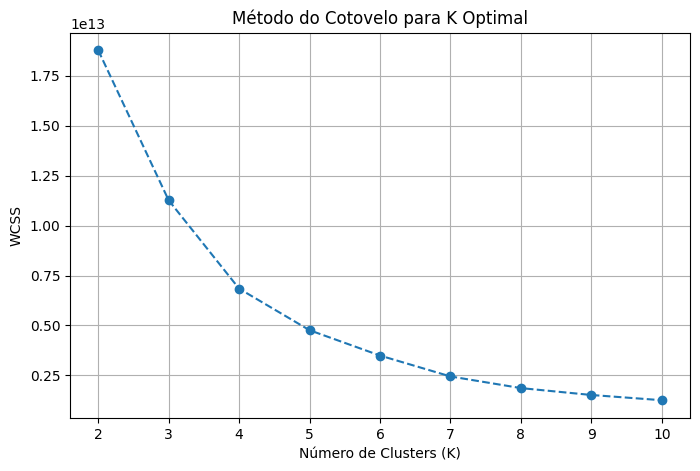

In [ ]:
# Método do Cotovelo para encontrar o número ideal de clusters (K)
wcss = []
range_n_clusters = range(2, 11) # Experimente diferentes valores de K (de 1 a 10, por exemplo)

# Iterar através de diferentes valores de K
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # n_init para garantir robustez
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # inertia_ é o WCSS

# Plotar o gráfico do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo para K Optimal')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

In [ ]:
# Escolha o número ideal de clusters com base no gráfico do cotovelo
# Substitua 'k_otimal' pelo valor que você determinou
k_otimal = 6 # Exemplo: Se o cotovelo estiver em K=4

# Inicializar o modelo K-Means
kmeans_final = KMeans(n_clusters=k_otimal, random_state=42, n_init=10)

# Ajustar o modelo aos dados
kmeans_final.fit(X)

# Obter os rótulos dos clusters para cada ponto de dados
cluster_labels = kmeans_final.labels_

# Adicionar os rótulos dos clusters de volta ao DataFrame original (opcional, mas útil)
# Certifique-se de que os índices de X e do DataFrame original correspondem após o dropna
# Se você removeu NaNs de X, os índices podem ter mudado.
# Uma maneira de garantir a correspondência é adicionar os rótulos a X e depois juntar com o original.
X['cluster'] = cluster_labels

# Se você precisa juntar com o DataFrame original (finalDf), use o índice
# finalDf = finalDf.join(X['cluster'], how='left') # Exemplo de como juntar
# Cuidado com o join se os índices não corresponderem perfeitamente após o dropna

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X.drop(columns=['cluster']), X['cluster'])
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.560


In [ ]:
X.groupby('cluster')[['Action', 'Drama', 'Comedy', 'Horror']].sum()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       45312 non-null  int64  
 1   popularity                  45312 non-null  float64
 2   runtime                     45312 non-null  float64
 3   vote_average                45312 non-null  float64
 4   vote_count                  45312 non-null  float64
 5   budget_log                  45312 non-null  float64
 6   revenue_log                 45312 non-null  float64
 7   release_year                45312 non-null  float64
 8   release_month               45312 non-null  float64
 9   Action                      45312 non-null  int64  
 10  Adventure                   45312 non-null  int64  
 11  Animation                   45312 non-null  int64  
 12  Comedy                      45312 non-null  int64  
 13  Crime                       453

In [ ]:
finalDfcomCluster = pd.concat([testDf, X['cluster']], axis=1)
finalDfcomCluster["cluster"] = X["cluster"].values

In [ ]:
finalDfcomCluster.head(3)

,index,id,title,genres,popularity,runtime,vote_average,vote_count,budget_log,revenue_log,...,War,Western,continent_Africa,continent_America_do_Norte,continent_America_do_Sul,continent_Asia,continent_Europa,continent_Oceania,continent_Outros,cluster
0,0,615656,Meg 2: The Trench,Action Science Fiction Horror,8763.998,116,7.079,1365.0,18.675323,19.679302,...,0,0,False,True,False,False,False,False,False,0
1,1,758323,The Pope's Exorcist,Horror Mystery Thriller,5953.227,103,7.433,545.0,16.705882,18.000241,...,0,0,False,True,False,False,False,False,False,0
2,2,533535,Deadpool & Wolverine,Action Comedy Science Fiction,5410.496,128,7.765,3749.0,19.113828,21.005725,...,0,0,False,True,False,False,False,False,False,0


In [ ]:
finalDfcomCluster.groupby('cluster')[[
    'popularity', 'vote_count', 'vote_average',
    'budget_log', 'revenue_log', 'release_year', 'runtime'
]].mean().round(2)

,popularity,vote_count,vote_average,budget_log,revenue_log,release_year,runtime
cluster,,,,,,,
0,29.78,1021.95,6.48,7.64,8.14,2004.14,102.15
1,2.05,36.06,6.21,0.96,0.58,1987.85,74.74
2,3.37,36.17,6.16,1.39,1.07,1993.59,90.32
3,1.19,39.58,6.08,0.79,0.37,1971.56,39.48
4,6.02,84.75,6.20,2.50,2.19,1998.74,96.78
5,0.60,157.72,5.25,6.01,3.29,2013.56,101.00


In [ ]:
finalDfcomCluster.groupby('cluster')['title'].apply(lambda x: x.sample(3, random_state=42).tolist())

,title
cluster,
0,"[The War of the Worlds, Chunin Exam on Fire! a..."
1,"[Fire, Short Skin, VIP]"
2,"[Butterfly & Sword, The Tenth Man, A Christmas..."
3,"[Who Killed Teddy Bear?, Movies, Something Goo..."
4,"[Love in the Forecast, War and Peace, The Brai..."
5,"[Omar, Cinco de Mayo: The Battle, Anna Nicole]"


In [ ]:
# Exemplo: Analisar as características médias de cada cluster
print("\nCaracterísticas Médias por Cluster:")
print(X.groupby('cluster').mean())

# Exemplo: Contar o número de filmes em cada cluster
print("\nContagem de Filmes por Cluster:")
print(X['cluster'].value_counts())

# Exemplo de visualização (requer redução de dimensionalidade, não incluída aqui)
# Veja exemplos de PCA ou t-SNE para visualização de clusters


Características Médias por Cluster:
                 index  popularity   runtime  vote_average  vote_count  \
cluster                                                                  
0         10423.419505    0.168098  0.197630      0.191815    0.387096   
1         97190.381744   -0.132885 -0.635462     -0.097269   -0.258210   
2         57712.850242   -0.118578 -0.161728     -0.148196   -0.258135   
3        198527.911950   -0.142243 -1.707549     -0.230563   -0.255904   
4         31730.486440   -0.089798  0.034507     -0.103913   -0.226341   
5        472874.944444   -0.148649  0.162817     -1.103664   -0.178577   

         budget_log  revenue_log  release_year  release_month    Action  ...  \
cluster                                                                  ...   
0          0.502459     0.566161      0.223514       0.038301  0.234884  ...   
1         -0.455378    -0.501308     -0.467321      -0.058188  0.059285  ...   
2         -0.393713    -0.432172     -0.223920    

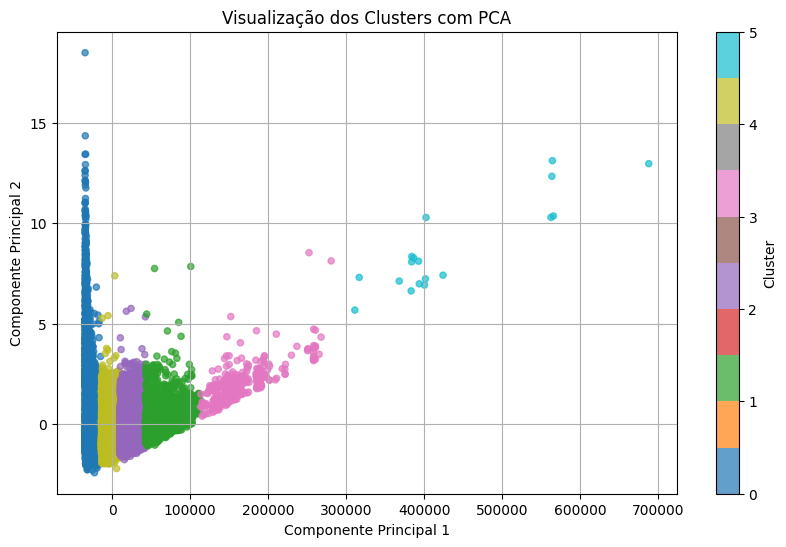

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduz para 2 dimensões para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.drop(columns='cluster'))  # remove a coluna cluster para não enviesar

# Plot dos clusters em 2D
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X['cluster'], cmap='tab10', s=20, alpha=0.7)
plt.title("Visualização dos Clusters com PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


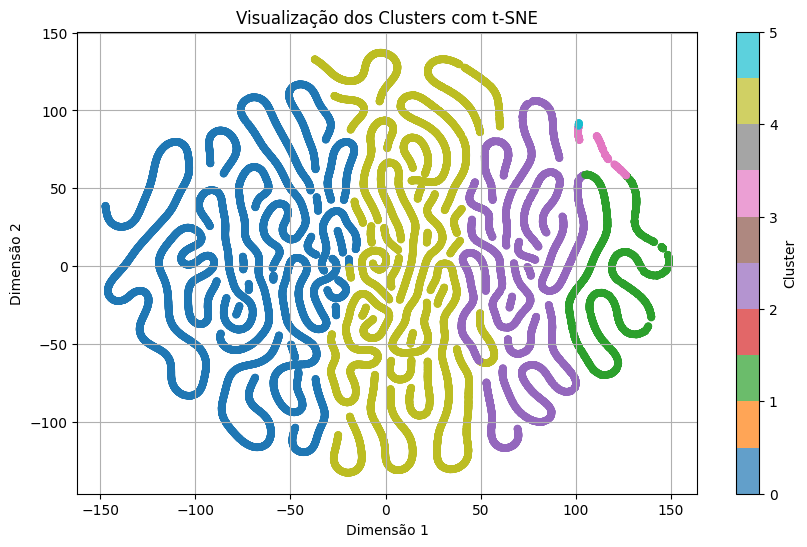

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X.drop(columns='cluster'))

plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=X['cluster'], cmap='tab10', s=20, alpha=0.7)
plt.title("Visualização dos Clusters com t-SNE")
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()